#**Stock Prediction analysis**

##Team: The Mean Squares

1. Jeyasri Subramanian [SJSU ID: 014510132]
2. Subarna Chowdhury Soma [SJSU ID: 014549587]
3. Pranav Lodha [SJSU ID: 009468121]
4. Wasae Qureshi [SJSU ID: 014569880]

##**Contributions:**

1. Compute Market Capitalization and Pre-processing **[ Pranav & Wasae]** 
2. Compute gini coefficient **[Subarna & Jeyasri]**
3. Clustering and labelling **[ Pranav & Wasae]** 
4. Decision Tree **[Subarna & Jeyasri]**
5. Data insights **[ Team]**

#Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier



##Mount Google drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Printing directory details
!ls '/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction'

 all_stocks_date.csv   Assignment-8
 Assignment-1	       compressed_financial_stmt.csv
 Assignment-2	       computed_data.csv
 Assignment-3	       computed_results.csv
 Assignment-4	       march_01_2020_complete_data.csv
 Assignment-5	       Presentation
 Assignment-6	      'ProjectRecording- March10'
 Assignment-7	       stock_summary_data_28_02_2020_16_46_36.csv


##**Load Dataset**


##**Note**: Last week, we have merged two datasets and did lot of preprocessing work, we have exported the clean dataframe as .csv file and loaded for further analysis


In [4]:
clean_stockdata =  pd.read_csv('/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction/computed_results.csv', low_memory =False)
clean_stockdata.tail()


,stock_name,net_profit_AYR,net_income_AYR,sector_code,stock_code,avg_yearly_returns,yearly_variance,cluster,labels,sector,percent_change_net_income
2950,WTRE,-1.783057,-1.724816,7,4393,0.250293,0.028474,0,0,Financial-Services,-395.558697
2951,WTS,-0.100119,-0.041285,10,4395,-0.042532,0.014479,0,0,Industrials,-2808.384525
2952,WTTR,0.000000,0.000000,7,4396,0.833954,1.018350,1,1,Energy,-5990.962632
2953,WUBA,-1.231558,-2.824307,7,4397,0.034941,0.446001,0,2,Communication-Services,-9628.641185
2954,WU,-0.571686,-0.576552,1,4372,0.161969,0.107521,0,0,Financial-Services,-100.000000


In [5]:
marketcapdata = pd.read_csv('/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction/stock_summary_data_28_02_2020_16_46_36.csv', low_memory =False)
marketcapdata.head(12)

,sector,stock_name,avg_yearly_return,variance_sum,overall_change_market_cap
0,Industrials,AAL,0.374324,0.480449,507.091595
1,Financial-Services,AAMC,1.818871,12.961993,-92.556070
2,Financial-Services,AAME,0.089031,0.094460,-43.324559
3,Technology,AAOI,0.136242,0.192417,428.088465
4,Technology,AAPL,0.298937,0.081963,281.521701
5,Consumer-Cyclical,AAP,0.190711,0.101058,213.765553
6,Real-Estate,AAT,0.124106,0.021524,263.844778
7,Industrials,AAWW,0.001038,0.070256,2.319224
8,Industrials,AAXN,0.376838,0.132533,1798.675057
9,Basic-Materials,AA,0.028114,0.177092,-76.132476


In [6]:
stock_data= pd.merge(clean_stockdata,marketcapdata,on='stock_name')
stock_data.head()

,stock_name,net_profit_AYR,net_income_AYR,sector_code,stock_code,avg_yearly_returns,yearly_variance,cluster,labels,sector_x,percent_change_net_income,sector_y,avg_yearly_return,variance_sum,overall_change_market_cap
0,AAL,0.054013,0.049454,8,3,0.374324,0.480449,1,2,Industrials,276.411934,Industrials,0.374324,0.480449,507.091595
1,AAMC,-0.218812,-0.211026,6,5,0.089031,0.094460,0,0,Financial-Services,-109.450979,Financial-Services,1.818871,12.961993,-92.556070
2,AAME,0.183065,0.301298,10,6,0.136242,0.192417,0,2,Financial-Services,-300.548651,Financial-Services,0.089031,0.094460,-43.324559
3,AAOI,0.201711,0.536071,10,8,0.298937,0.081963,0,0,Technology,-336.027178,Technology,0.136242,0.192417,428.088465
4,AAPL,0.014789,0.254047,2,7,0.190711,0.101058,0,0,Technology,570.989678,Technology,0.298937,0.081963,281.521701


In [7]:
stock_data.shape

(2756, 15)

#Determine Data Correlation

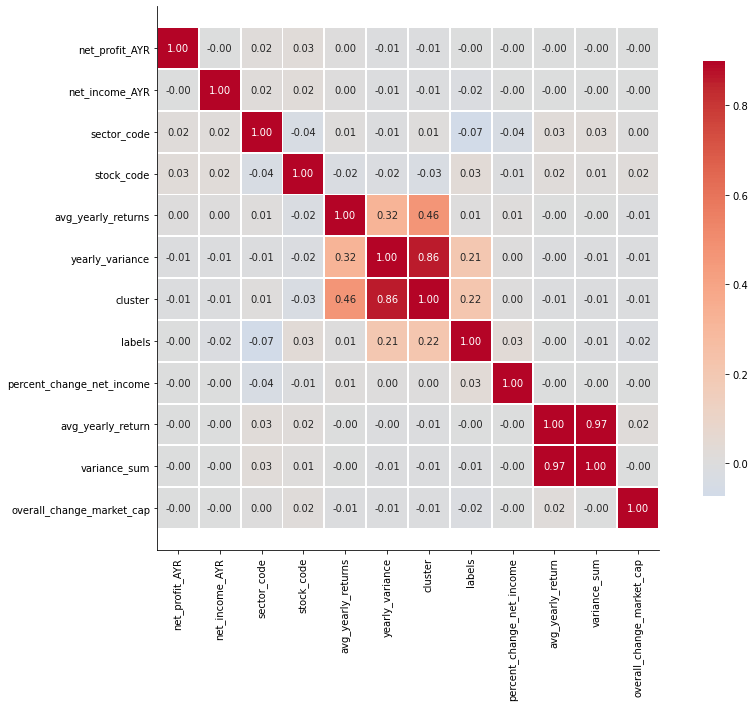

In [8]:
corr = stock_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

#Gini-Index
###We are dropping previous cluster results and continuing with gini-index analysis

In [9]:
stock_data_filtered = stock_data.drop('cluster',axis=1)
stock_data_filtered = stock_data_filtered.drop('labels',axis=1)
stock_data_filtered = stock_data_filtered.drop('sector_x',axis=1)
stock_data_filtered = stock_data_filtered.drop('sector_y',axis=1)
stock_data_filtered = stock_data_filtered.drop('avg_yearly_return',axis=1)
stock_data_filtered = stock_data_filtered.drop('variance_sum',axis=1)
stock_data_filtered = stock_data_filtered.drop('stock_name',axis=1)
#X = X.drop('stock_name',axis=1)

stock_data_filtered.head()

,net_profit_AYR,net_income_AYR,sector_code,stock_code,avg_yearly_returns,yearly_variance,percent_change_net_income,overall_change_market_cap
0,0.054013,0.049454,8,3,0.374324,0.480449,276.411934,507.091595
1,-0.218812,-0.211026,6,5,0.089031,0.094460,-109.450979,-92.556070
2,0.183065,0.301298,10,6,0.136242,0.192417,-300.548651,-43.324559
3,0.201711,0.536071,10,8,0.298937,0.081963,-336.027178,428.088465
4,0.014789,0.254047,2,7,0.190711,0.101058,570.989678,281.521701


In [10]:
stock_data_filtered.isnull().sum()

net_profit_AYR               0
net_income_AYR               0
sector_code                  0
stock_code                   0
avg_yearly_returns           0
yearly_variance              0
percent_change_net_income    0
overall_change_market_cap    0
dtype: int64

In [0]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [12]:
feature_cols=['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap','avg_yearly_returns']
gini_values = []
for col in feature_cols:
  dataset = stock_data_filtered[col].values.tolist()
  value = gini(dataset)
  print('cols ',col,' - gini coeff is :',value)
  gini_values.append(value)

cols  net_profit_AYR  - gini coeff is : 0.9994166837727732
cols  net_income_AYR  - gini coeff is : 1.1203294361106197
cols  sector_code  - gini coeff is : 0.2602220319722408
cols  stock_code  - gini coeff is : 0.33435996743343543
cols  yearly_variance  - gini coeff is : 0.7074317904368256
cols  percent_change_net_income  - gini coeff is : 1.1516568716636488
cols  overall_change_market_cap  - gini coeff is : 0.996352284230169
cols  avg_yearly_returns  - gini coeff is : 0.9266052493123866


In [13]:
gini_values.sort()
gini_values

[0.2602220319722408,
 0.33435996743343543,
 0.7074317904368256,
 0.9266052493123866,
 0.996352284230169,
 0.9994166837727732,
 1.1203294361106197,
 1.1516568716636488]

##Clustering with respect to gini-index

In [0]:
stock_data_for_clustering = stock_data[['percent_change_net_income','net_income_AYR','stock_code','sector_code']]
stock_data_for_clustering = stock_data_for_clustering[(stock_data_for_clustering['net_income_AYR'] < 1.5)] #(stock_data_for_clustering['percent_change_net_income'] < 2500) & 

In [0]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [0]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    # try:
    #     df.drop('cluster', axis=1, inplace=True)
    # except:
    #     next
    # X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    X = df.iloc[:,1:]

    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [0]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    # try:
    #     df.drop('cluster', axis=1, inplace=True)
    # except:
    #     next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [0]:
def kmeans_cluster(data_to_fit, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_to_fit)
    print(data_to_fit)
    cluster_indices = kmeans.predict(data_to_fit)
    return cluster_indices


In [0]:
def kmeans_plot(cluster_indices):
   fig, ax = plt.subplots()
   scatter = ax.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = cluster_indices, cmap ="rainbow")

   # produce a legend with the unique colors from the scatter
   legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
   ax.add_artist(legend1)
   plt.title('K-Means Clustering') 
   plt.gcf().set_size_inches(22,8)
   plt.show()

In [0]:
def fractal_clustering(data, n_iterations =3,n_clusters=3):
  for i in range(n_iterations):

    plot_cluster(data, max_loop=25)
    first_trial = apply_cluster(data, clusters=n_clusters)
    cluster_perf_df = (
      first_trial
      .groupby('cluster')
      .agg({"percent_change_net_income":"mean", "net_income_AYR":"mean", "stock_code":"count","sector_code":"count"})
      .sort_values('percent_change_net_income')
      .reset_index()
    )

    print(cluster_perf_df.head())
    data = first_trial.query("cluster == 0").reset_index(drop=True)
    print(data.head())
  
  return data



clustering performance
-----------------------------------
silhouette score: 1.0
sse withing cluster: 18323295121.0
   cluster  percent_change_net_income  net_income_AYR  stock_code  sector_code
0        0               6.459601e+03        7.832732        2754         2754
1        2               1.254048e+08       -1.355999           1            1
2        1               4.095925e+08       -0.165049           1            1
   net_profit_AYR  net_income_AYR  ...  overall_change_market_cap  cluster
0        0.054013        0.049454  ...                 507.091595        0
1       -0.218812       -0.211026  ...                 -92.556070        0
2        0.183065        0.301298  ...                 -43.324559        0
3        0.201711        0.536071  ...                 428.088465        0
4        0.014789        0.254047  ...                 281.521701        0

[5 rows x 9 columns]
clustering performance
-----------------------------------
silhouette score: 1.0
sse withing clu

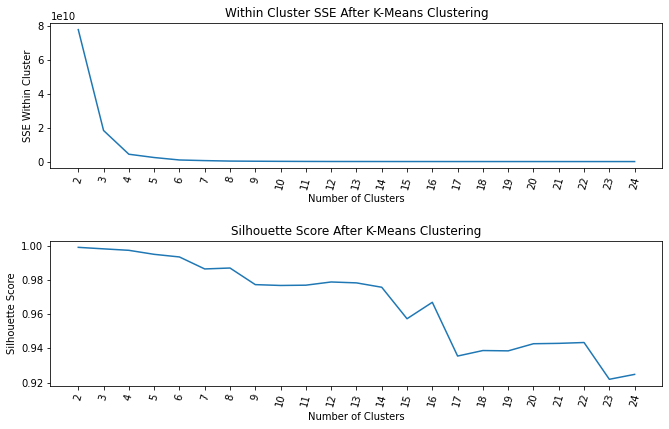

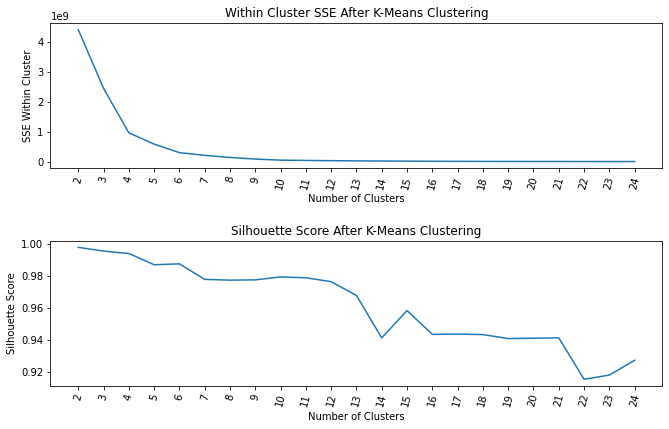

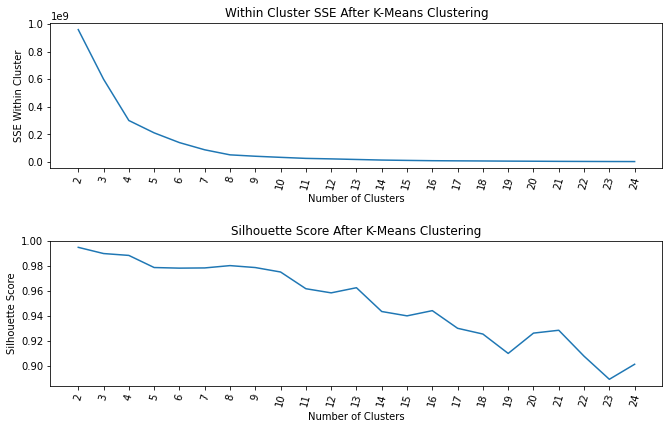

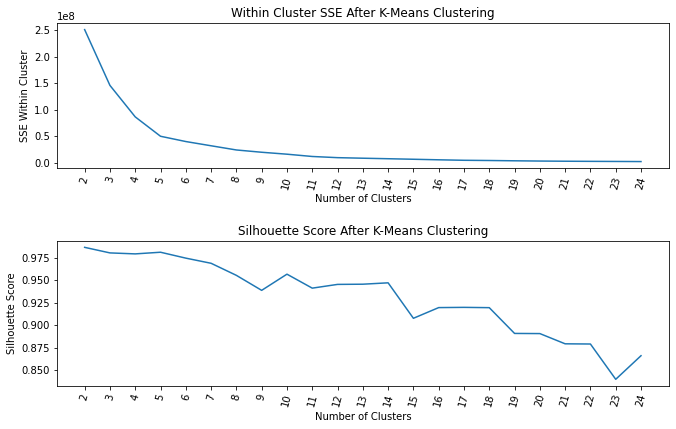

In [21]:
k_means_result = fractal_clustering(stock_data_filtered,n_iterations=4)


[[ 5.40125222e-02  4.94538867e-02  8.00000000e+00 ...  2.76411934e+02
   5.07091595e+02  0.00000000e+00]
 [-2.18811592e-01 -2.11025654e-01  6.00000000e+00 ... -1.09450979e+02
  -9.25560695e+01  0.00000000e+00]
 [ 1.83065055e-01  3.01297831e-01  1.00000000e+01 ... -3.00548651e+02
  -4.33245587e+01  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  7.00000000e+00 ... -5.99096263e+03
  -6.79212733e+01  0.00000000e+00]
 [-1.23155777e+00 -2.82430659e+00  7.00000000e+00 ... -9.62864118e+03
  -1.75908120e+01  0.00000000e+00]
 [-5.71685969e-01 -5.76551956e-01  1.00000000e+00 ... -1.00000000e+02
   1.50065981e+02  0.00000000e+00]]


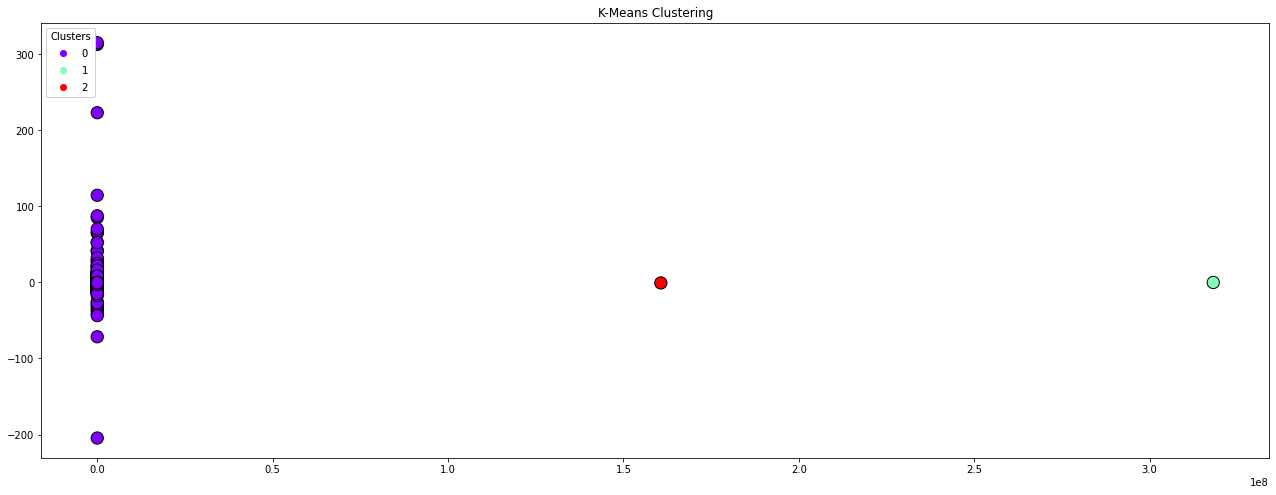

In [22]:
data_to_fit = k_means_result.values
cluster_indices=kmeans_cluster(data_to_fit, 3)
kmeans_plot(cluster_indices)

In [23]:
k_means_result.shape

(2732, 9)

In [0]:
from sklearn.mixture import GaussianMixture


In [0]:
def gmm_cluster(data_to_fit,n_clusters):
  print('gmm')
  gmm = GaussianMixture(n_components=n_clusters, max_iter=50).fit(data_to_fit)
  labels = gmm.predict(data_to_fit)
  gmm_scores = gmm.score_samples(data_to_fit)

  print('Means by sklearn:\n', gmm.means_)
  print('Scores by sklearn:\n', gmm_scores[0:20])
  fig, ax = plt.subplots()
  
  scatter = ax.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = labels, cmap ="viridis")
   # produce a legend with the unique colors from the scatter
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
  ax.add_artist(legend1)
  plt.title('GMM Clustering') 
  plt.gcf().set_size_inches(22,8)
  plt.show()
  return labels


In [0]:
def gmm_clustering_iteration(df,n_iterations=2,n_clusters=3):
  df['labels'] =  0

  for i in range(n_iterations):
    cluster_perf_df = (
      df
      .groupby('labels')
      .agg({"net_income_AYR":"max", "percent_change_net_income":"max", "stock_code":"count"})
      .sort_values('net_income_AYR')
      .reset_index()
    )

    print(cluster_perf_df)
    df = df[df['labels'] == 0]


    df = df[['net_income_AYR','percent_change_net_income','stock_code','sector_code']]
    
    data_to_gmm = df.values
    labels =  gmm_cluster(data_to_gmm, n_clusters)
    df['labels'] = labels
   
  return df

In [27]:
stock_data_filtered.shape

(2756, 9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


   labels  net_income_AYR  percent_change_net_income  stock_code
0       0      315.331893               4.095925e+08        2755
gmm
Means by sklearn:
 [[ 5.36317808e-01  6.46250599e+03  2.20044969e+03  6.03414457e+00]
 [-1.65048644e-01  4.09592453e+08  1.75900000e+03  2.00000000e+00]
 [-1.35599946e+00  1.25404760e+08  1.87600000e+03  1.00000000e+00]]
Scores by sklearn:
 [-29.08804554 -28.892045   -29.77925707 -29.77573233 -30.00559795
 -29.36546635 -29.07782274 -29.07590205 -37.0535148  -28.91479212
 -29.07553245 -28.91362113 -29.53219765 -29.99307316 -28.90691643
 -29.09098043 -29.3563743  -28.86456084 -28.9001408  -28.89772563]


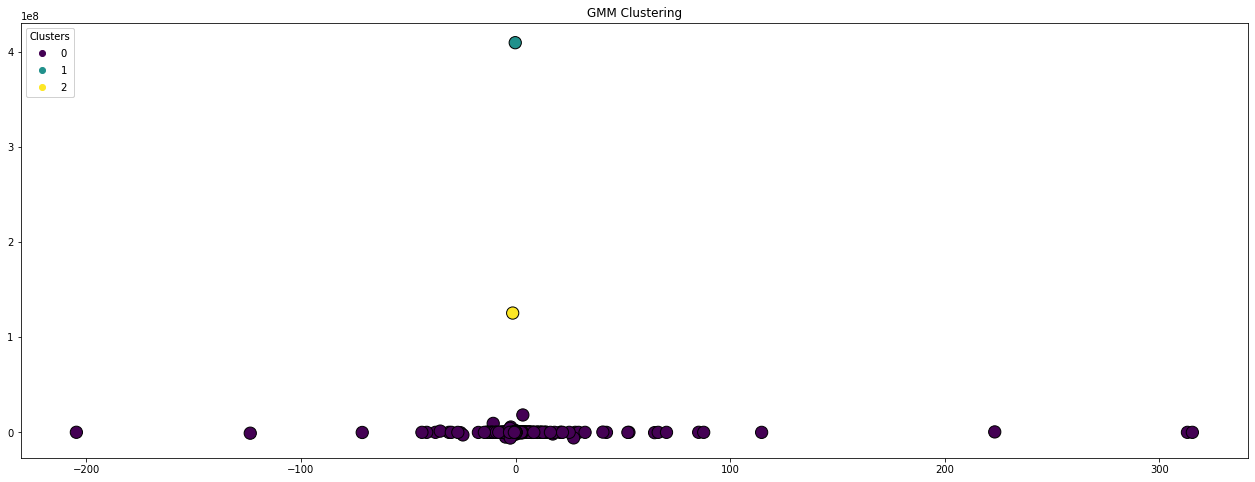

   labels  net_income_AYR  percent_change_net_income  stock_code
0       2       -1.355999               1.254048e+08           1
1       1       -0.165049               4.095925e+08           1
2       0      315.331893               1.826766e+07        2753
gmm
Means by sklearn:
 [[ 5.41442349e-01 -7.17246854e+03  2.19965078e+03  6.03601310e+00]
 [ 3.37180528e+00  1.82676638e+07  2.00000000e+03  2.00000000e+00]
 [-5.10463215e+00  6.41357707e+06  2.99933333e+03  5.66666667e+00]]
Scores by sklearn:
 [-28.37673709 -28.18023995 -29.06810643 -29.06454104 -29.29278636
 -28.65428554 -28.36646313 -28.36448679 -53.47571909 -28.20296263
 -28.36415413 -28.20204906 -28.81959844 -29.28018402 -28.19558578
 -28.40931517 -28.64487698 -28.15249875 -28.18863743 -28.1861211 ]


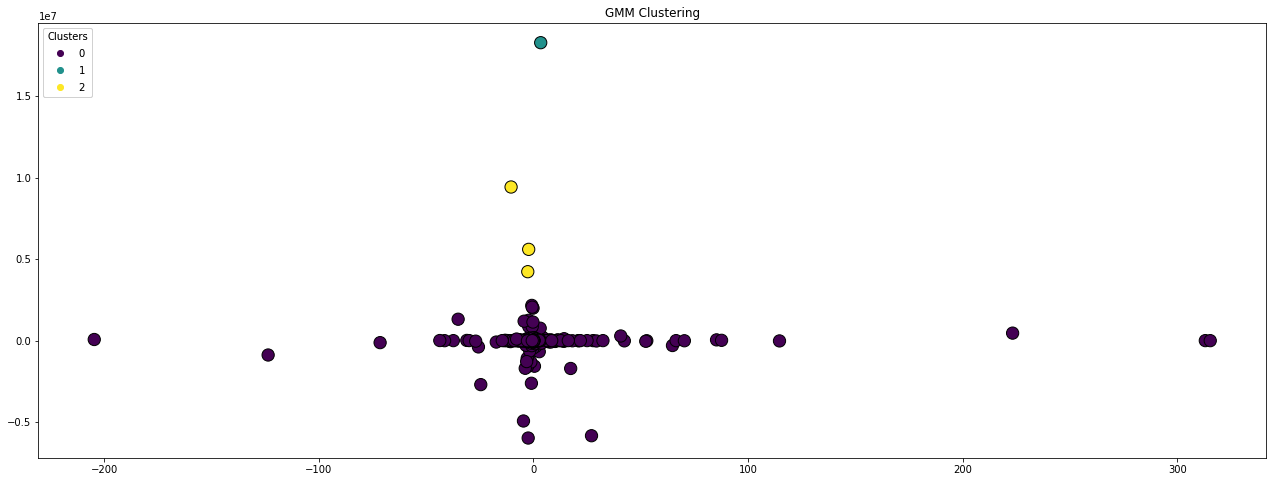

   labels  net_income_AYR  percent_change_net_income  stock_code
0       2       -2.230088               9.418542e+06           3
1       1        3.371805               1.826766e+07           1
2       0      315.331893               2.159768e+06        2749
gmm
Means by sklearn:
 [[ 1.31946546e-01  8.87315484e+01  2.20628798e+03  6.06681306e+00]
 [ 6.63934594e+00 -5.57743511e+06  2.54433333e+03  8.00000000e+00]
 [ 2.41655255e+00 -6.57904817e+03  2.16651057e+03  5.87996742e+00]]
Scores by sklearn:
 [-20.10862143 -20.08990619 -20.90186418 -21.19900858 -21.17662333
 -20.3552826  -22.25050569 -21.49123074 -43.85620477 -20.53805576
 -20.06693812 -19.94566452 -22.8008871  -21.02791936 -20.41995546
 -31.39824305 -29.38286235 -20.80585313 -20.13788151 -19.98766597]


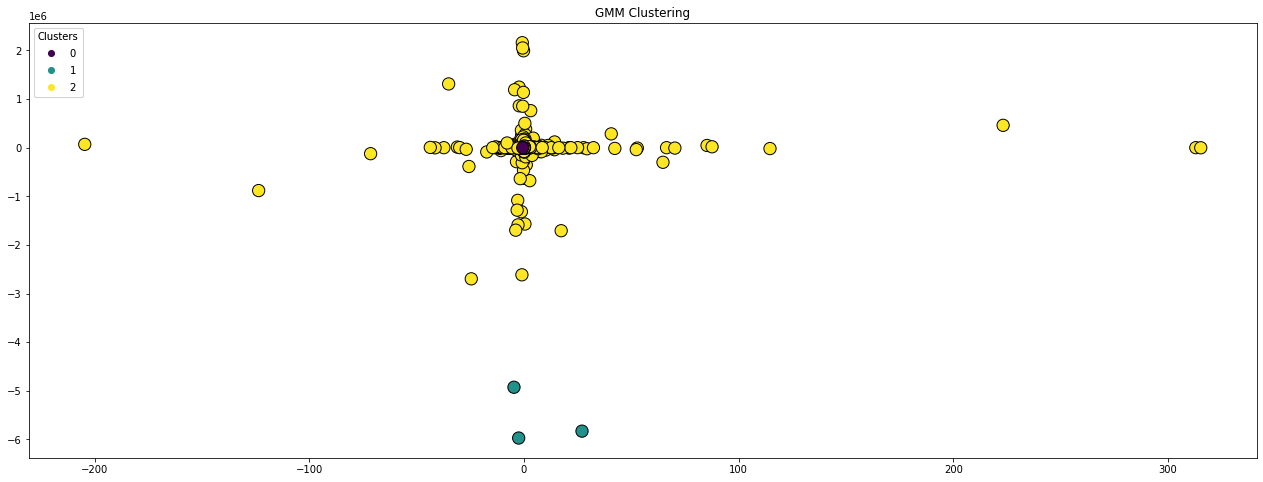

,net_income_AYR,percent_change_net_income,stock_code,sector_code,labels
0,0.049454,276.411934,3,8,0
1,-0.211026,-109.450979,5,6,0
2,0.301298,-300.548651,6,10,0
3,0.536071,-336.027178,8,10,0
4,0.254047,570.989678,7,2,0


In [28]:
data = stock_data_filtered[(stock_data_filtered['net_income_AYR'] < 20000) ]
gmm_result = gmm_clustering_iteration(data,3,3)
gmm_result.head()

gmm
Means by sklearn:
 [[ 6.20615537e-02 -2.22426292e+00  9.96584314e+02  6.06376235e+00]
 [ 8.28200919e-02  1.04849248e+01  3.20308245e+03  5.96532385e+00]
 [ 2.12799964e-01  2.18019416e+02  2.24300928e+03  6.14264398e+00]]
Scores by sklearn:
 [-19.04442429 -18.1859974  -21.27275345 -22.49601856 -22.29408731
 -17.71228161 -22.49400008 -22.17073833 -21.80519576 -17.47825013
 -17.38089671 -23.28398348 -18.61403421 -21.61475327 -25.90005181
 -21.83137708 -20.04301864 -18.56904147 -21.74526442 -18.88897436]


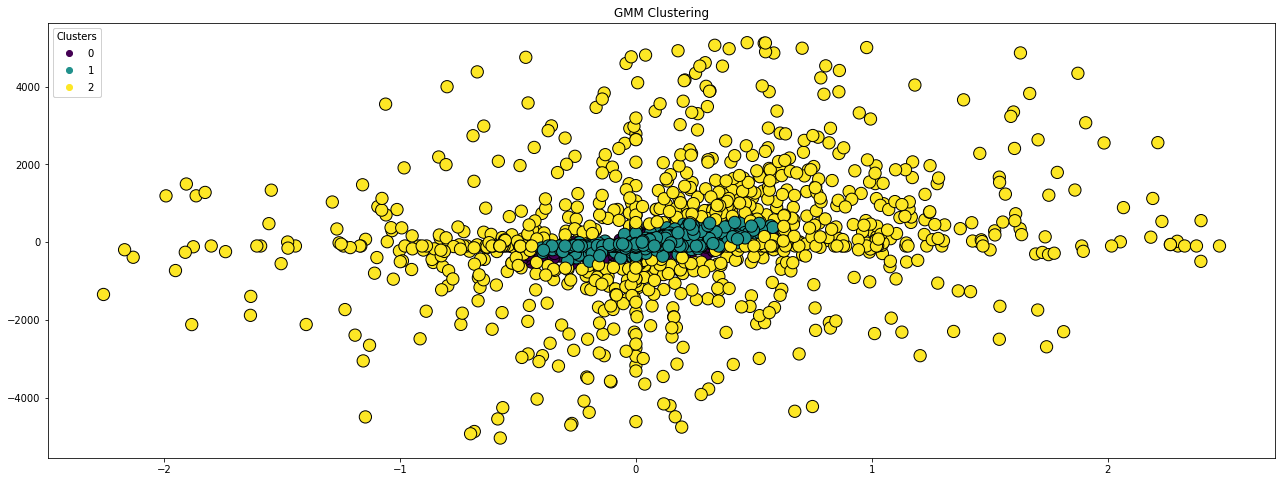

,net_income_AYR,percent_change_net_income,stock_code,sector_code,labels
0,0.049454,276.411934,3,8,0
1,-0.211026,-109.450979,5,6,0
2,0.301298,-300.548651,6,10,0
3,0.536071,-336.027178,8,10,2
4,0.254047,570.989678,7,2,2


In [29]:
gmm_result.head()
gmm_result = gmm_result[gmm_result['labels'] == 0]
gmm_result = gmm_result[['net_income_AYR','percent_change_net_income','stock_code','sector_code']]
data_to_gmm = gmm_result.values
labels =  gmm_cluster(data_to_gmm, 3)
gmm_result['labels'] = labels
gmm_result.head()

In [30]:
cluster_perf_df = (
    gmm_result
    .groupby('labels')
    .agg({"net_income_AYR":"max", "percent_change_net_income":"max", "stock_code":"count"})
    .sort_values('net_income_AYR')
    .reset_index()
)
print(gmm_result.shape)
cluster_perf_df

(2261, 5)


,labels,net_income_AYR,percent_change_net_income,stock_code
0,1,0.580235,522.219367,720
1,0,0.608558,556.724177,620
2,2,2.474378,5130.275871,921


In [31]:
gmm_result['stability'] = gmm_result['labels'].map(lambda x: 0 if (x == 2) else 1) 
gmm_result.tail()

,net_income_AYR,percent_change_net_income,stock_code,sector_code,labels,stability
2747,0.228155,460.862539,4387,1,1,1
2749,0.090277,521.066208,4390,8,2,0
2750,0.078135,-100.000000,4391,10,1,1
2752,-0.041285,-2808.384525,4395,10,2,0
2755,-0.576552,-100.000000,4372,1,2,0


##Label stocks data with Cluster result

In [0]:
feature_cols=['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap']


In [33]:
stable_stocks = gmm_result[gmm_result['stability'] == 1]['stock_code'].tolist()
len(stable_stocks)

1340

In [34]:
stock_data_filtered['stability'] = stock_data_filtered['stock_code'].map(lambda x: 1 if x in stable_stocks else 0)
stock_data_filtered.head()

,net_profit_AYR,net_income_AYR,sector_code,stock_code,avg_yearly_returns,yearly_variance,percent_change_net_income,overall_change_market_cap,cluster,stability
0,0.054013,0.049454,8,3,0.374324,0.480449,276.411934,507.091595,0,1
1,-0.218812,-0.211026,6,5,0.089031,0.094460,-109.450979,-92.556070,0,1
2,0.183065,0.301298,10,6,0.136242,0.192417,-300.548651,-43.324559,0,1
3,0.201711,0.536071,10,8,0.298937,0.081963,-336.027178,428.088465,0,0
4,0.014789,0.254047,2,7,0.190711,0.101058,570.989678,281.521701,0,0


In [35]:
stock_data_filtered.shape

(2756, 10)

#Decision Tree

In [0]:
X = stock_data_filtered[feature_cols]
y = stock_data_filtered['stability']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [0]:
y_train1 = np.asarray(y_train.values, dtype="int")
y_test1= np.asarray(y_test.values, dtype='int')

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.969770253929867


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


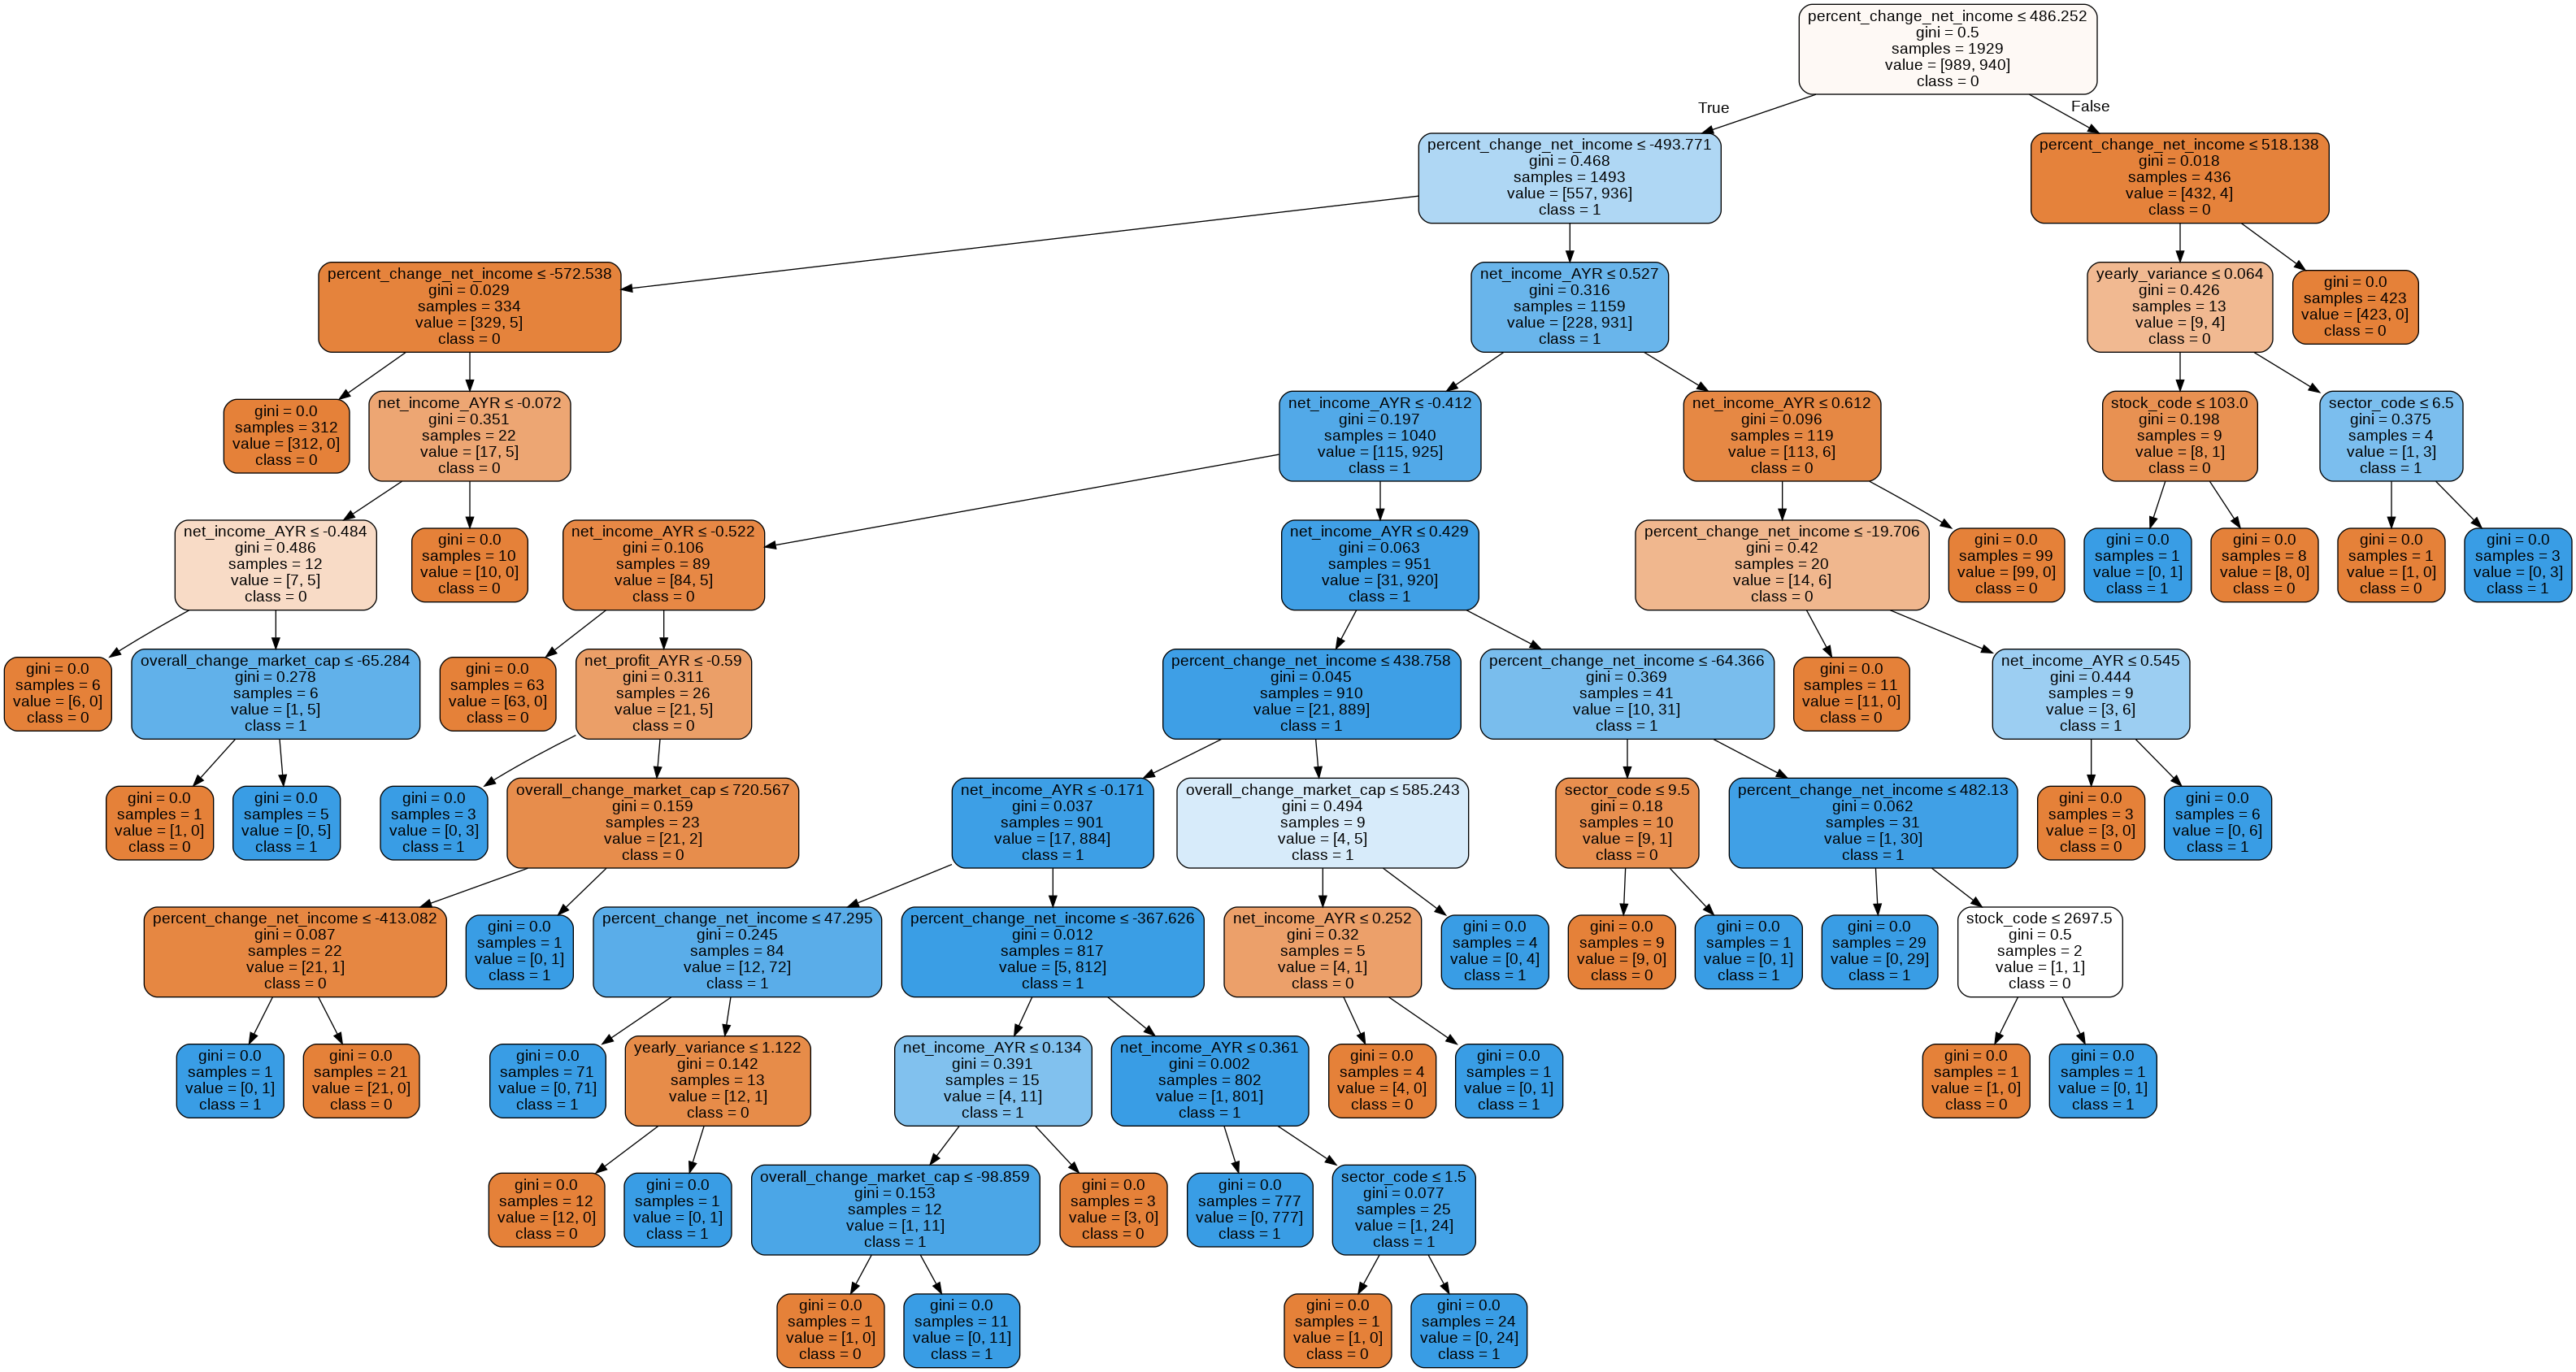

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stocks.png')
Image(graph.create_png())

In [42]:
stock_data_filtered.shape

(2756, 10)

##Data Insights



From the reference of stock prediction problem ,we identified '**Market Capitalization**' is a key factor to analyse the stability of stocks. We have computed Market capitializion data from the last day of the market open for all stocks. This week, we have integrated Market Captilization with prior stock features such as average yearly returns, annual variance, percentage change in net income, average change in net income.

**Gini Coefficient** is a metric to measure the feature's ability to classify data. We have computed gini coefficient for all the features, we picked the top two features - percent change in net income and net income yearly variance which has high gini coefficient score.

**Clustering** is a unsupervised learning technique, which helps to label unknown data. We tried clustering with the two high gini coefficient features. Initally, we started with K-means for different iterations 4-7, the stocks data doesn't converge to any useful insight, hence we tried GMM clustering. In GMM Clustering, after 3 iterations with 3 clusters per iteration, the plotted datapoints grouped to useful clusters. 

* Cluster 0 - grouped net_income_yearly_variance average to 0.580235 and percent_change_net_income average to 522.219%

* Cluster 1 - grouped net_income_yearly_variance average to 0.608558 and percent_change_net_income average to 556.7241% 

* Cluster 2 - grouped net_income_yearly_variance average to 2.474378 and percent_change_net_income average to 5130.275871% 

From the cluster results, we did **label** the data applying our domain knowledge. Cluster 0 and cluster 1 are highly densed in the middle of the plane with minimal average variance in the features, which symbolizes the stability of stock data, so labelled this stocks as *'Stable'*. Accordingly, rest of the stock data is labelled as *'Unstable'*

We have applied **Decision Tree** classifier for the labeled data. We have predicted the stability of stocks using Decision Tree, the model determined the stocks stability with 97% accuracy. From the tree structure, it can be found that 'Percentage change in net income' has the highest gini index. Similarly, net income average yearly returns, yearly_variance has the second and third highest value.

##Impact on Project
From the previous week work, we have many features in the dataset. As a part of this week classification work, we begin with determining the feature with good ability to classify data. We applied clustering for the top two features in the dataset, which helped us to label the stable stock data. Decision Tree classifier, helped us to classify the stable stocks using net income, variance and returns value. We would like to continue the analysis on determining stable stocks using various algorithms and compare the accuracy scores and error values.  


#Reference

https://towardsdatascience.com/using-the-gini-coefficient-to-evaluate-the-performance-of-credit-score-models-59fe13ef420